# Name: Ashish Chokhani
# Roll No: 2021102016

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Function to read the image
def read_image(filename):
    image = cv2.imread(filename)
    return image

# Function to convert from BGR to RGB
def bgr_to_rgb(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to quantize the image
def quantize_image(image, n_bits):
    levels = 2 ** n_bits
    quantized_img = np.floor(image / 256 * levels) * (256 / levels)
    return quantized_img.astype(np.uint8)

### Part 1
#### Explanation
- As the number of bits decreases, the image quality degrades due to the reduction in the number of available colors.
- At 8 bits, the image quality is nearly identical to the original.
- At 1 bit, the image is reduced to just 2 colors, resulting in a highly pixelated and posterized effect.
- Mid-range bit depths (3-5 bits) show a trade-off between file size and image quality, with some visible color banding but still recognizable features.
- Larger number of bits for quantization preserve more detail.
- Smaller number of bits for quantization introduce blockiness and noise.
- The effect of quantization is more pronounced for images with fine details and subtle color variations.
- MSB: We preserve the higher-order bits and discarding the lower-order bits. This approach determine the primary magnitude of the pixel values. LSB: We preserve the LSBs, which would result in a different type of quantization that often emphasizes the finer details of the image.

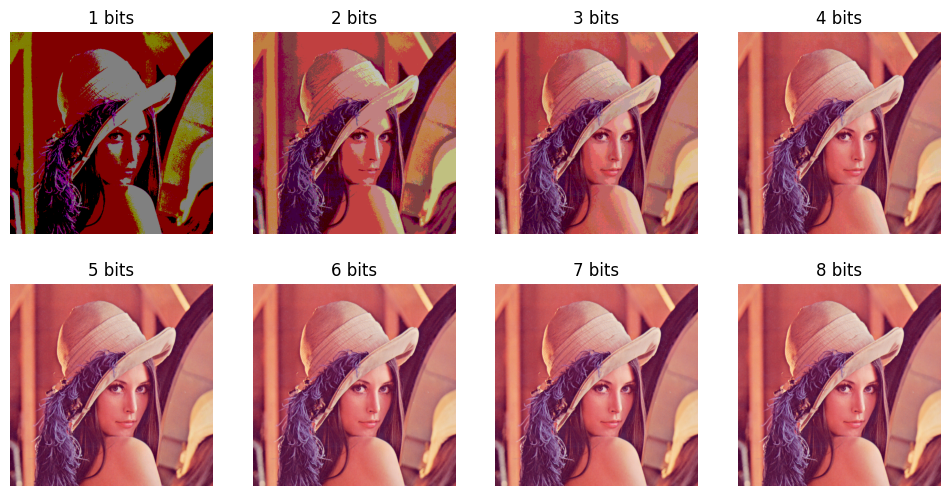

In [3]:
image_path = '../src_img/Lenna.png'
image = read_image(image_path)
rgb_image = bgr_to_rgb(image)

bit_depths = [1, 2, 3, 4, 5, 6, 7, 8]
quantized_images = [quantize_image(rgb_image, bits) for bits in bit_depths]

out_dir = '../out_img'
os.makedirs(out_dir, exist_ok=True)

plt.figure(figsize=(12, 6))
for i, q_img in enumerate(quantized_images):
    plt.subplot(2, 4, i + 1)
    plt.imshow(q_img)
    plt.title(f'{bit_depths[i]} bits')
    plt.axis('off')

output_path = os.path.join(out_dir, 'Leena_quantization_grid.png')
plt.savefig(output_path)
plt.show()


### Part 2.1

In [4]:
# Function to compute the histogram of an image channel
def compute_histogram(image_channel):
    histogram, _ = np.histogram(image_channel, bins=np.arange(257), density=False)
    return histogram

# Function to compute the cumulative distribution function (CDF) from a histogram
def compute_cdf(histogram):
    cdf = histogram.cumsum()
    cdf_normalized = np.round(cdf * (255 / cdf[-1])).astype(np.uint8)
    return cdf_normalized

# Function to apply histogram equalization using the CDF
def apply_equalization(image_channel, cdf):
    equalized_image_channel = cdf[image_channel]
    return equalized_image_channel

# Function to equalize the histogram of a grayscale image
def histequalize(image):
    histogram = compute_histogram(image)
    cdf = compute_cdf(histogram)
    equalized_image = apply_equalization(image, cdf)
    return equalized_image

# Function to equalize the histogram of a color image by processing each channel separately
def histequalize_color_image(image):
    equalized_image = np.zeros_like(image)
    for i in range(3):  # Process R, G, B channels separately
        equalized_image[..., i] = histequalize(image[..., i])
    return equalized_image


### Part 2.2

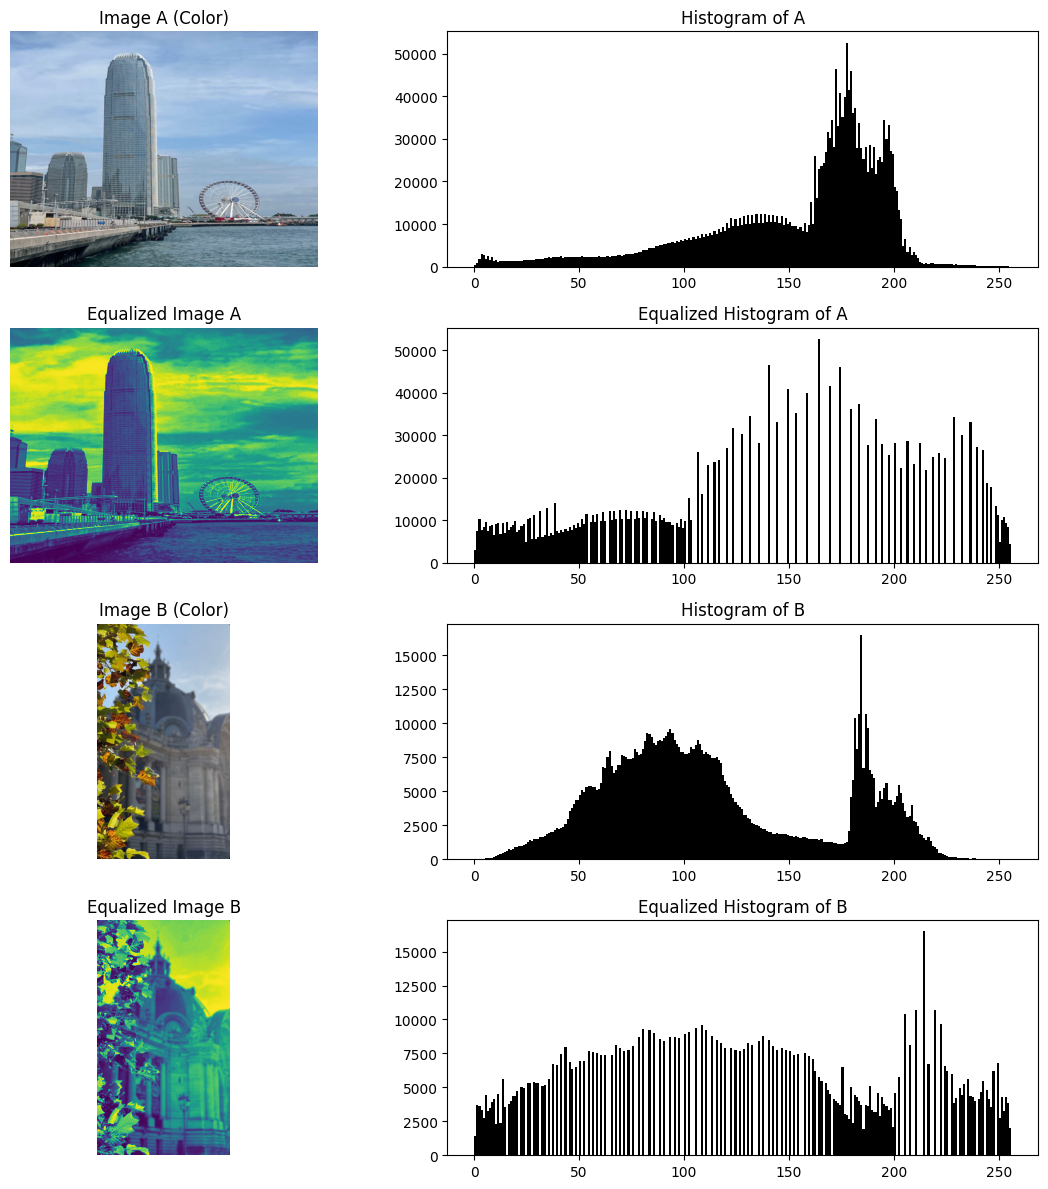

In [5]:
# Function to plot images and histograms in a 4x2 layout and save the plot
def plot_images_and_histograms(image_a, image_b, out_dir):
    gray_image_a = cv2.cvtColor(image_a, cv2.COLOR_RGB2GRAY)
    gray_image_b = cv2.cvtColor(image_b, cv2.COLOR_RGB2GRAY)
    equalized_gray_a = histequalize(gray_image_a)
    equalized_gray_b = histequalize(gray_image_b)

    plt.figure(figsize=(12, 12))

    # Image A and its histogram
    plt.subplot(4, 2, 1)
    plt.imshow(image_a)
    plt.title('Image A (Color)')
    plt.axis('off')

    plt.subplot(4, 2, 2)
    plt.hist(gray_image_a.ravel(), 256, [0, 256], color='black')
    plt.title('Histogram of A')

    # Equalized Image A and its histogram
    plt.subplot(4, 2, 3)
    plt.imshow(equalized_gray_a)
    plt.title('Equalized Image A')
    plt.axis('off')

    plt.subplot(4, 2, 4)
    plt.hist(equalized_gray_a.ravel(), 256, [0, 256], color='black')
    plt.title('Equalized Histogram of A')

    # Image B and its histogram
    plt.subplot(4, 2, 5)
    plt.imshow(image_b)
    plt.title('Image B (Color)')
    plt.axis('off')

    plt.subplot(4, 2, 6)
    plt.hist(gray_image_b.ravel(), 256, [0, 256], color='black')
    plt.title('Histogram of B')

    # Equalized Image B and its histogram
    plt.subplot(4, 2, 7)
    plt.imshow(equalized_gray_b)
    plt.title('Equalized Image B')
    plt.axis('off')

    plt.subplot(4, 2, 8)
    plt.hist(equalized_gray_b.ravel(), 256, [0, 256], color='black')
    plt.title('Equalized Histogram of B')

    plt.tight_layout()
    
    # Save the plot
    output_path = os.path.join(out_dir, 'images_and_histograms.png')
    plt.savefig(output_path)
    plt.show()

# Set the output directory
out_dir = '../out_img'
os.makedirs(out_dir, exist_ok=True) 

# Image paths
image_a_path = '../src_img/3_mod.png'  
image_b_path = '../src_img/image.jpg'

# Load images
image_a = bgr_to_rgb(read_image(image_a_path))
image_b = bgr_to_rgb(read_image(image_b_path))

# Task 2: Plot A and B, their histograms, and equalized histograms
plot_images_and_histograms(image_a, image_b, out_dir)


Histogram equalization aims to redistribute the intensity values in an image to create a uniform histogram. This enhances contrast and improves image visibility, especially in cases where the original image has a skewed histogram.
However, when applied directly to colored images, histogram equalization can sometimes produce undesirable results because the technique treats each color channel (red, green, and blue) independently, potentially leading to color distortions.

### Part 2.3

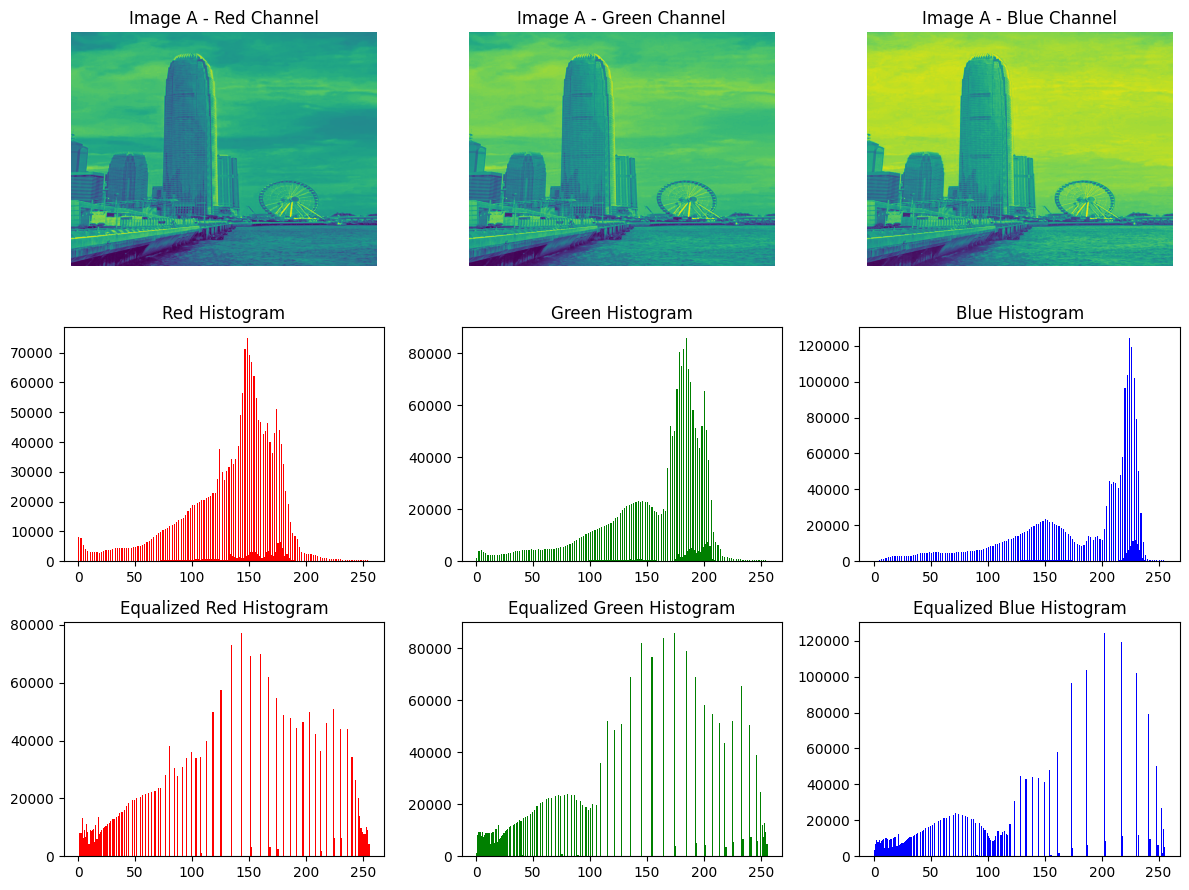

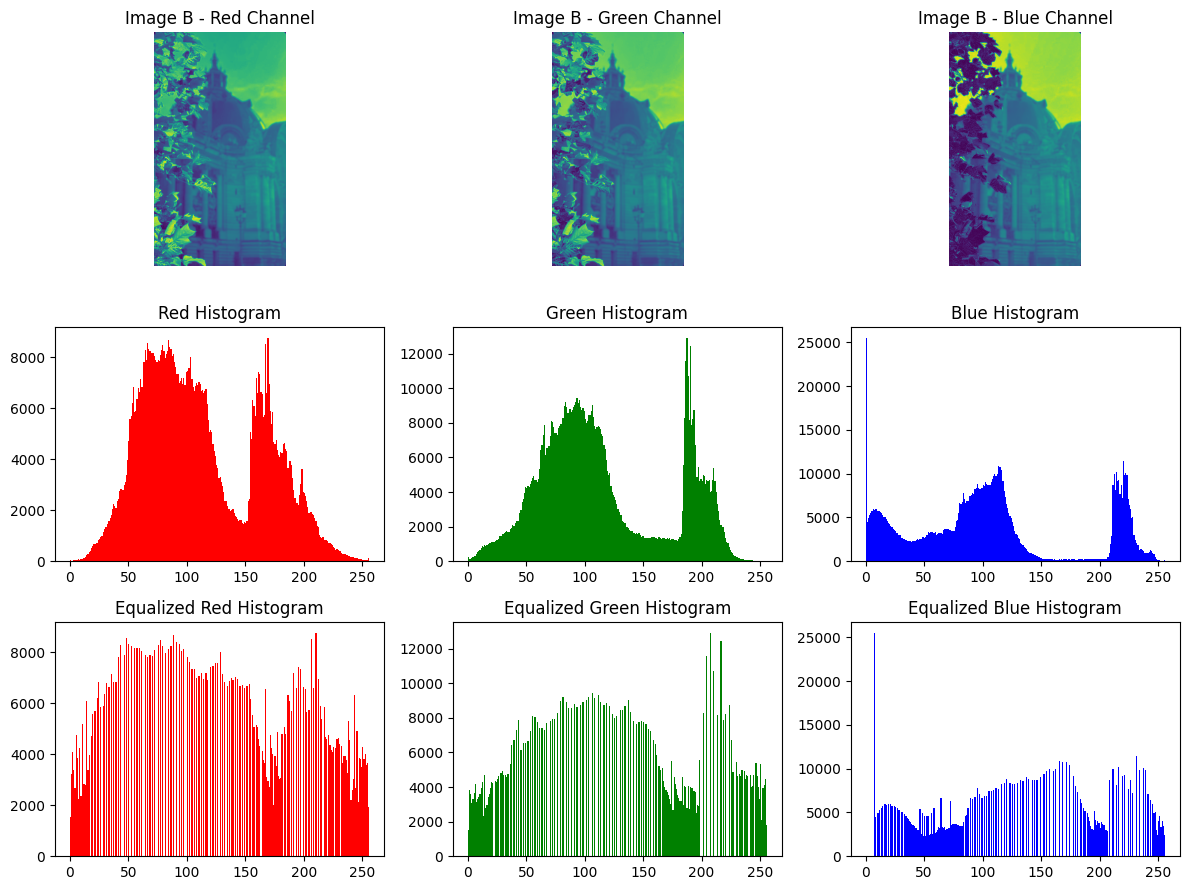

In [6]:
# Function to plot RGB channels, their histograms, and equalized histograms in a 3x3 layout and save the plot
def plot_rgb_channels(image, title_prefix, out_dir, image_name):
    plt.figure(figsize=(12, 9))
    
    for i, color in enumerate(['Red', 'Green', 'Blue']):
        channel = image[..., i]
        equalized_channel = histequalize(channel)

        # Original channel
        plt.subplot(3, 3, i + 1)
        plt.imshow(channel)
        plt.title(f'{title_prefix} - {color} Channel')
        plt.axis('off')

        # Histogram of the original channel
        plt.subplot(3, 3, i + 4)
        plt.hist(channel.ravel(), 256, [0, 256], color=color.lower())
        plt.title(f'{color} Histogram')

        # Equalized channel histogram
        plt.subplot(3, 3, i + 7)
        plt.hist(equalized_channel.ravel(), 256, [0, 256], color=color.lower())
        plt.title(f'Equalized {color} Histogram')

    plt.tight_layout()
    
    # Save the plot
    output_path = os.path.join(out_dir, f'{image_name}_rgb_channels_histograms.png')
    plt.savefig(output_path)
    plt.show()


out_dir = '../out_img'
os.makedirs(out_dir, exist_ok=True) 

# Task 3: Plot and save RGB channels, their histograms, and equalized histograms
plot_rgb_channels(image_a, 'Image A', out_dir, 'image_a')
plot_rgb_channels(image_b, 'Image B', out_dir, 'image_b')


### Part 2.4

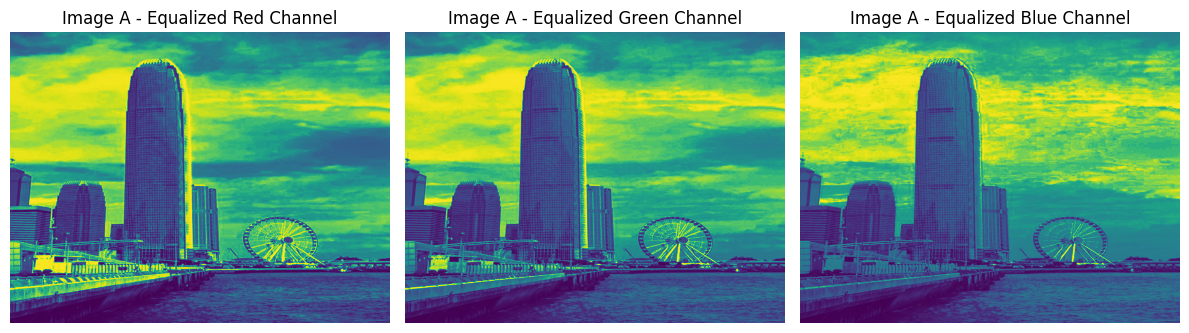

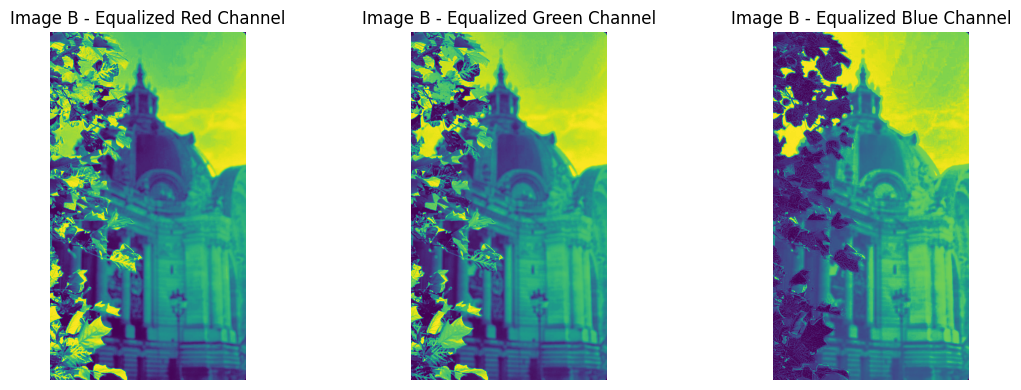

In [7]:
# Function to plot equalized RGB channels in a 1x3 layout and save the plot
def plot_equalized_rgb_channels(image, title_prefix, out_dir, image_name):
    plt.figure(figsize=(12, 4))

    for i, color in enumerate(['Red', 'Green', 'Blue']):
        equalized_channel = histequalize(image[..., i])

        plt.subplot(1, 3, i + 1)
        plt.imshow(equalized_channel)
        plt.title(f'{title_prefix} - Equalized {color} Channel')
        plt.axis('off')

    plt.tight_layout()
    
    # Save the plot
    output_path = os.path.join(out_dir, f'{image_name}_equalized_rgb_channels.png')
    plt.savefig(output_path)
    plt.show()


out_dir = '../out_img'
os.makedirs(out_dir, exist_ok=True) 

# Task 4: Plot and save equalized RGB channels
plot_equalized_rgb_channels(image_a, 'Image A', out_dir, 'image_a')
plot_equalized_rgb_channels(image_b, 'Image B', out_dir, 'image_b')


### Part 2.5

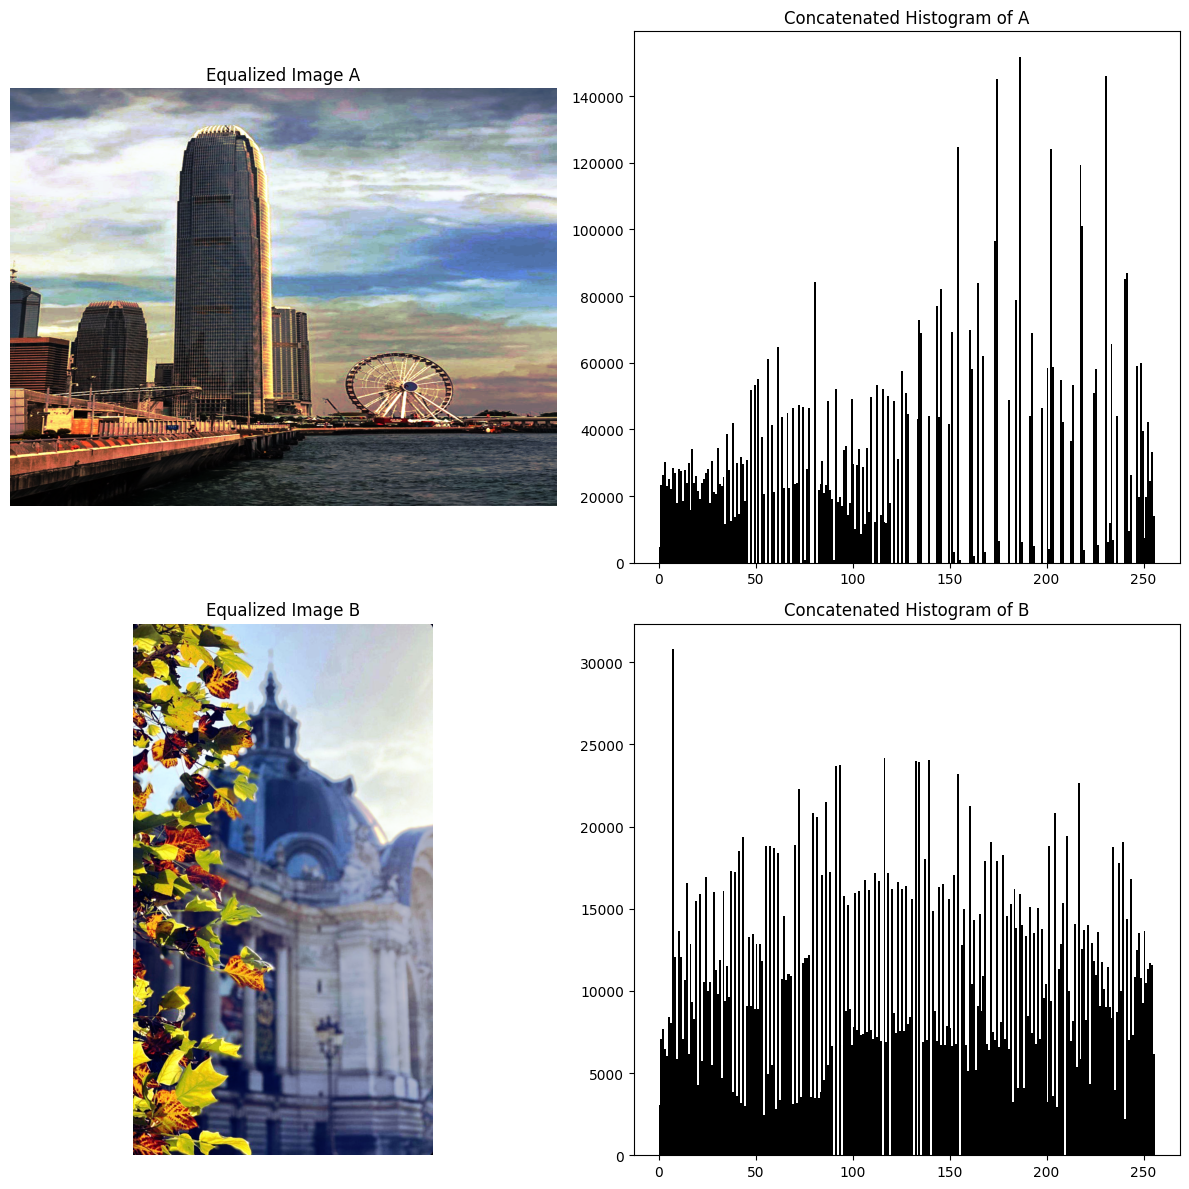

In [8]:
# Function to merge equalized channels and plot the final image and its histogram, then save the plot
def plot_merged_equalized_images(image_a, image_b, out_dir, image_a_name, image_b_name):
    equalized_image_a = histequalize_color_image(image_a)
    equalized_image_b = histequalize_color_image(image_b)

    plt.figure(figsize=(12, 12))

    # Plot Equalized Image A
    plt.subplot(2, 2, 1)
    plt.imshow(equalized_image_a)
    plt.title('Equalized Image A')
    plt.axis('off')

    # Histogram of Equalized Image A
    plt.subplot(2, 2, 2)
    plt.hist(equalized_image_a.ravel(), 256, [0, 256], color='black')
    plt.title('Concatenated Histogram of A')

    # Plot Equalized Image B
    plt.subplot(2, 2, 3)
    plt.imshow(equalized_image_b)
    plt.title('Equalized Image B')
    plt.axis('off')

    # Histogram of Equalized Image B
    plt.subplot(2, 2, 4)
    plt.hist(equalized_image_b.ravel(), 256, [0, 256], color='black')
    plt.title('Concatenated Histogram of B')

    plt.tight_layout()

    output_path_a = os.path.join(out_dir, f'{image_a_name}_merged_equalized_image.png')
    output_path_b = os.path.join(out_dir, f'{image_b_name}_merged_equalized_image.png')
    plt.savefig(output_path_a)
    plt.savefig(output_path_b)
    plt.show()

out_dir = '../out_img'
os.makedirs(out_dir, exist_ok=True) 

# Task 5: Plot and save merged equalized images and their histograms
plot_merged_equalized_images(image_a, image_b, out_dir, 'image_a', 'image_b')


### Part 2.6

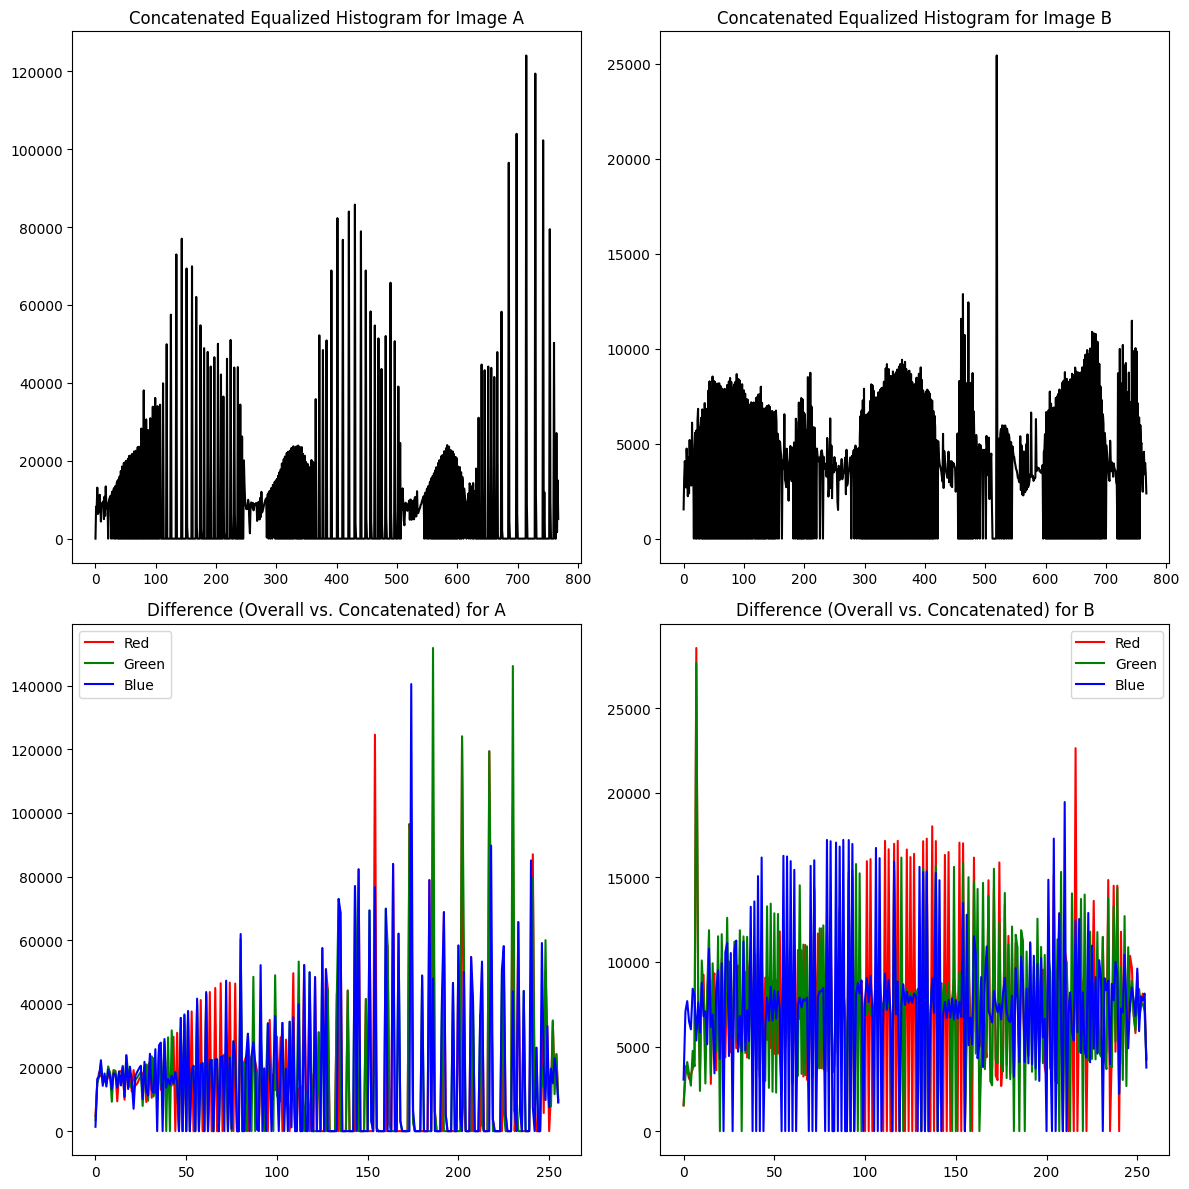

In [9]:

# Function to concatenate the equalized RGB histograms
def concatenate_equalized_histograms(image):
    concatenated_histogram = np.zeros(256 * 3, dtype=int)
    for i, color in enumerate(['Red', 'Green', 'Blue']):
        channel = image[..., i]
        equalized_channel = histequalize(channel)
        histogram = compute_histogram(equalized_channel)
        concatenated_histogram[i * 256:(i + 1) * 256] = histogram
    return concatenated_histogram

# Function to plot concatenated histograms and compare with overall equalized histograms, then save the plot
def plot_comparison(image_a, image_b, out_dir, image_a_name, image_b_name):
    concatenated_hist_a = concatenate_equalized_histograms(image_a)
    concatenated_hist_b = concatenate_equalized_histograms(image_b)

    overall_hist_a = compute_histogram(histequalize_color_image(image_a).ravel())
    overall_hist_b = compute_histogram(histequalize_color_image(image_b).ravel())

    plt.figure(figsize=(12, 12))

    plt.subplot(2, 2, 1)
    plt.plot(concatenated_hist_a, color='black')
    plt.title('Concatenated Equalized Histogram for Image A')

    plt.subplot(2, 2, 2)
    plt.plot(concatenated_hist_b, color='black')
    plt.title('Concatenated Equalized Histogram for Image B')

    # Difference between concatenated and overall histograms for A
    plt.subplot(2, 2, 3)
    plt.plot(np.abs(overall_hist_a - concatenated_hist_a[:256]), color='red', label='Red')
    plt.plot(np.abs(overall_hist_a - concatenated_hist_a[256:512]), color='green', label='Green')
    plt.plot(np.abs(overall_hist_a - concatenated_hist_a[512:]), color='blue', label='Blue')
    plt.title('Difference (Overall vs. Concatenated) for A')
    plt.legend()

    # Difference between concatenated and overall histograms for B
    plt.subplot(2, 2, 4)
    plt.plot(np.abs(overall_hist_b - concatenated_hist_b[:256]), color='red', label='Red')
    plt.plot(np.abs(overall_hist_b - concatenated_hist_b[256:512]), color='green', label='Green')
    plt.plot(np.abs(overall_hist_b - concatenated_hist_b[512:]), color='blue', label='Blue')
    plt.title('Difference (Overall vs. Concatenated) for B')
    plt.legend()

    plt.tight_layout()

    # Save the plot
    output_path_a = os.path.join(out_dir, f'{image_a_name}_comparison.png')
    output_path_b = os.path.join(out_dir, f'{image_b_name}_comparison.png')
    plt.savefig(output_path_a)
    plt.savefig(output_path_b)
    plt.show()


out_dir = '../out_img'
os.makedirs(out_dir, exist_ok=True) 

# Task 6: Concatenate histograms, compare, and save the plots
plot_comparison(image_a, image_b, out_dir, 'image_a', 'image_b')


### Part 2.7

- Histogram equalization on a grayscale version of a color image may not effectively enhance the contrast of the image as it loses color information. 
- Equalizing each color channel separately, as done below, often provides a better contrast enhancement for color images.
- This task reinforced the importance of understanding individual channel contributions in histogram equalization, revealing how color channels interact differently when equalized separately versus combined.

### Part 3.1

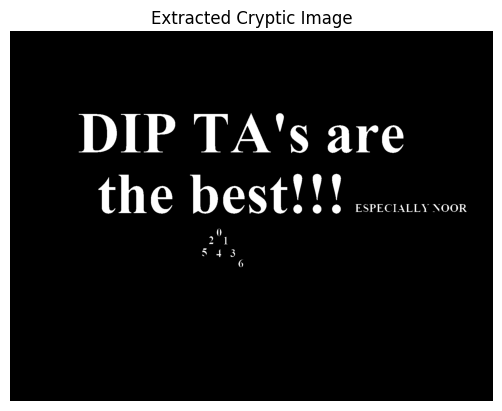

In [10]:
def decrypt(image):
    # Extract the message from the LSBs
    cryptic_image = np.zeros_like(image)
    cryptic_image[:, :, 0] = (image[:, :, 0] & 1) * 255
    cryptic_image[:, :, 1] = (image[:, :, 1] & 1) * 255
    cryptic_image[:, :, 2] = (image[:, :, 2] & 1) * 255
    
    return cryptic_image

# Read the image
image = read_image('../src_img/6_mod.png')
cryptic_image = decrypt(image)
cryptic_image_rgb = bgr_to_rgb(cryptic_image)

# Set the output directory and filename
out_dir = '../out_img'
os.makedirs(out_dir, exist_ok=True)
output_path = os.path.join(out_dir, 'extracted_cryptic_image.png')


plt.imshow(cryptic_image_rgb)
plt.title("Extracted Cryptic Image")
plt.axis('off')
plt.savefig(output_path)
plt.show()


### Part 3.2 
DIP TA's are the best, especially Noor

### Part 3.3
The reason why the cryptic image was weirdly proportioned is that the dimensions of the decrypted message is only 497 cross 1342 while the size of the image is 1280 cross 1672. This leads to imperfections in the embedding of the message in the base image because of Dimensionality inconsistencies, thereby leading to operations being performed on only a subset of pixels in the image, thereby leading to a weirdly proportioned image.

### Part 3.4
The cryptic image was constructed using the concept of quantization. For each pixel, only 1 bit is for used for representation. What was actually done in order to encode the image was to take only the LSB of each and every pixel value. Since the value of the bit can only be 1 or 0, a one-to-one mapping was constructed which mapped 0 to a value of 0 only, and 1 to 255, which indicated completely black and completely white pixels. The message was embedded in the form of white pixels in the image and rest of the pixels were turned 0 so that message after decryption is clearly visible.

### Part 3.5

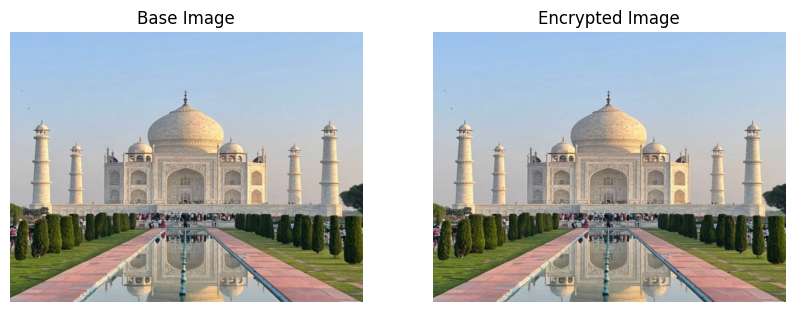

In [11]:
def crypt(base_image, message_image):
    if base_image.shape != message_image.shape:
        message_image = cv2.resize(message_image, (base_image.shape[1], base_image.shape[0]))

    encrypted_image = np.copy(base_image)
    
    # Embed the message by replacing the LSBs of the base image with the message image bits
    encrypted_image[:, :, 0] = (base_image[:, :, 0] & 0xFE) | ((message_image[:, :, 0] >> 7) & 1)
    encrypted_image[:, :, 1] = (base_image[:, :, 1] & 0xFE) | ((message_image[:, :, 1] >> 7) & 1)
    encrypted_image[:, :, 2] = (base_image[:, :, 2] & 0xFE) | ((message_image[:, :, 2] >> 7) & 1)
    
    return encrypted_image

# Read the images
base_image = read_image('../src_img/0_mod.png')
message_image = read_image('../src_img/2_mod.png')

encrypted_image = crypt(base_image, message_image)

# Convert images from BGR to RGB
base_image_rgb = bgr_to_rgb(base_image)
encrypted_image_rgb = bgr_to_rgb(encrypted_image)

# Set the output directory and filenames
out_dir = '../out_img'
os.makedirs(out_dir, exist_ok=True)
base_image_output_path = os.path.join(out_dir, 'base_image.png')
encrypted_image_output_path = os.path.join(out_dir, 'encrypted_image.png')

# Plot and save the base and encrypted images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(base_image_rgb)
plt.title("Base Image")
plt.axis('off')
plt.savefig(base_image_output_path) 

plt.subplot(1, 2, 2)
plt.imshow(encrypted_image_rgb)
plt.title("Encrypted Image")
plt.axis('off')
plt.savefig(encrypted_image_output_path)  
plt.show()


### Part 3.6

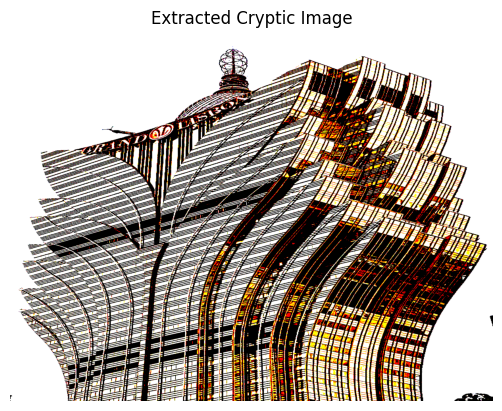

In [12]:
def decrypt(image):
    # Extract the message from the LSBs
    cryptic_image = np.zeros_like(image)
    cryptic_image[:, :, 0] = (image[:, :, 0] & 1) * 255
    cryptic_image[:, :, 1] = (image[:, :, 1] & 1) * 255
    cryptic_image[:, :, 2] = (image[:, :, 2] & 1) * 255
    
    return cryptic_image

# Decrypt the message from the encrypted image
cryptic_image = decrypt(encrypted_image)
cryptic_image_rgb = bgr_to_rgb(cryptic_image)


out_dir = '../out_img'
os.makedirs(out_dir, exist_ok=True)
cryptic_image_output_path = os.path.join(out_dir, 'extracted_cryptic_image.png')


plt.imshow(cryptic_image_rgb)
plt.title("Extracted Cryptic Image")
plt.axis('off')
plt.savefig(cryptic_image_output_path) 
plt.show()


### Part 4.1

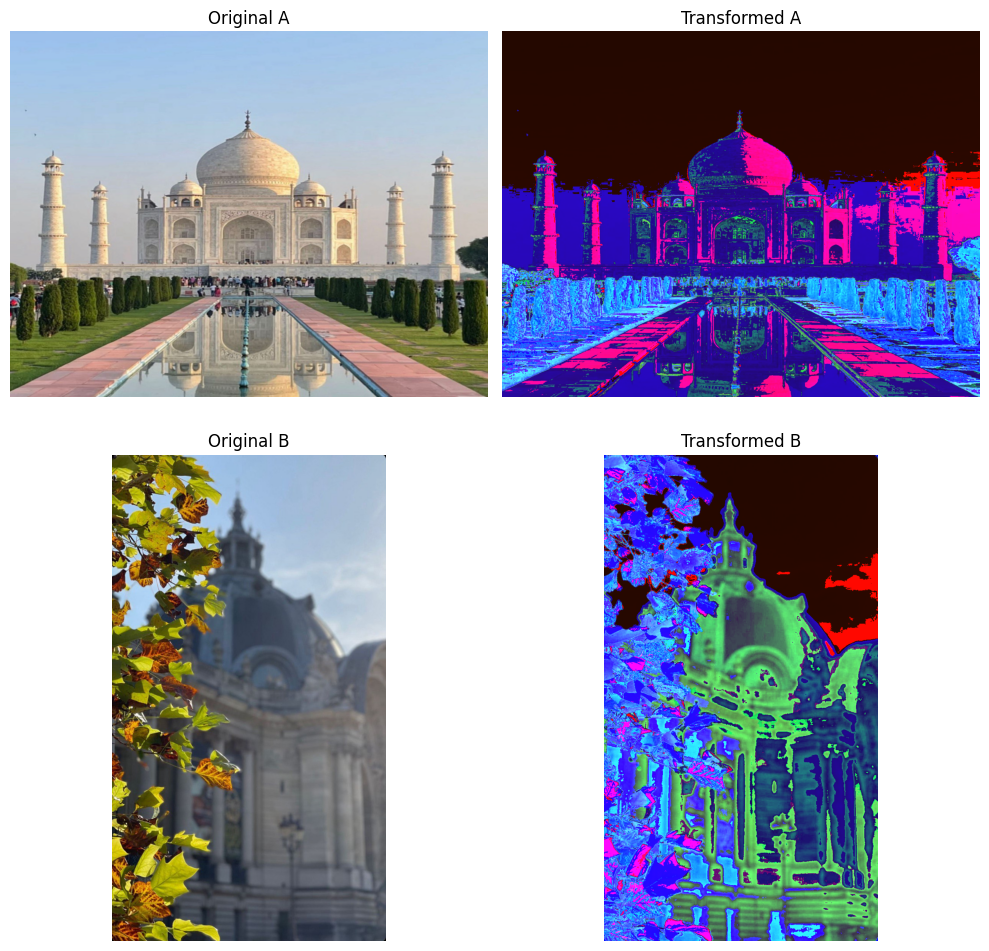

In [13]:
# Load the images
image_A = read_image('../src_img/0_mod.png')
image_B = read_image('../src_img/image.jpg')

# Convert images to RGB (OpenCV loads images in BGR by default)
image_A = bgr_to_rgb(image_A) 
image_B = bgr_to_rgb(image_B)

# Extract color channels directly
red_A = image_A[:, :, 0]
green_A = image_A[:, :, 1]
blue_A = image_A[:, :, 2]

red_B = image_B[:, :, 0]
green_B = image_B[:, :, 1]
blue_B = image_B[:, :, 2]

def transform_red_channel(x, a):
    transformed = np.zeros_like(x)
    transformed[(x >= 0) & (x <= 100)] = x[(x >= 0) & (x <= 100)] + a
    transformed[(x > 100) & (x <= 200)] = x[(x > 100) & (x <= 200)] / a + 2 * a
    transformed[x > 200] = 255
    return np.clip(transformed,0,255)

def transform_green_channel(x, a):
    transformed = np.zeros_like(x)
    transformed[(x >= 0) & (x <= 128)] = 5 * x[(x >= 0) & (x <= 128)] + 1
    transformed[x > 128] = a / x[x > 128] + 8
    return np.clip(transformed,0,255)

def transform_blue_channel(x):
    transformed = np.zeros_like(x)
    transformed[(x >= 0) & (x <= 75)] = 255
    transformed[(x > 75) & (x <= 200)] = x[(x > 75) & (x <= 200)]
    transformed[x > 200] = 0
    return np.clip(transformed,0,255)

# Apply transformations
a = 7 
red_A_transformed = transform_red_channel(red_A, a)
green_A_transformed = transform_green_channel(green_A, a)
blue_A_transformed = transform_blue_channel(blue_A)

red_B_transformed = transform_red_channel(red_B, a)
green_B_transformed = transform_green_channel(green_B, a)
blue_B_transformed = transform_blue_channel(blue_B)

# Reconstruct the transformed images by stacking the transformed channels
transformed_A = np.dstack([red_A_transformed, green_A_transformed, blue_A_transformed])
transformed_B = np.dstack([red_B_transformed, green_B_transformed, blue_B_transformed])

# Set the output directory and filenames
out_dir = '../out_img'
os.makedirs(out_dir, exist_ok=True)
transformed_A_output_path = os.path.join(out_dir, 'transformed_A.png')
transformed_B_output_path = os.path.join(out_dir, 'transformed_B.png')

# Plot the original and transformed images and save the figures
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(image_A)
axs[0, 0].set_title("Original A")
axs[0, 0].axis('off')

axs[0, 1].imshow(transformed_A)
axs[0, 1].set_title("Transformed A")
axs[0, 1].axis('off')

axs[1, 0].imshow(image_B)
axs[1, 0].set_title("Original B")
axs[1, 0].axis('off')

axs[1, 1].imshow(transformed_B)
axs[1, 1].set_title("Transformed B")
axs[1, 1].axis('off')

plt.tight_layout()

plt.savefig(transformed_A_output_path)  
plt.savefig(transformed_B_output_path)
plt.show()


### Part 4.2

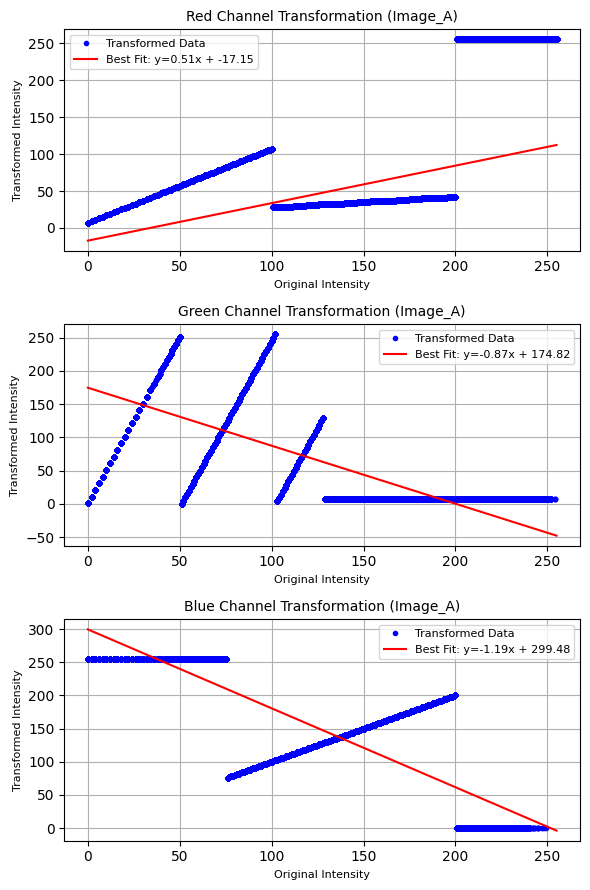

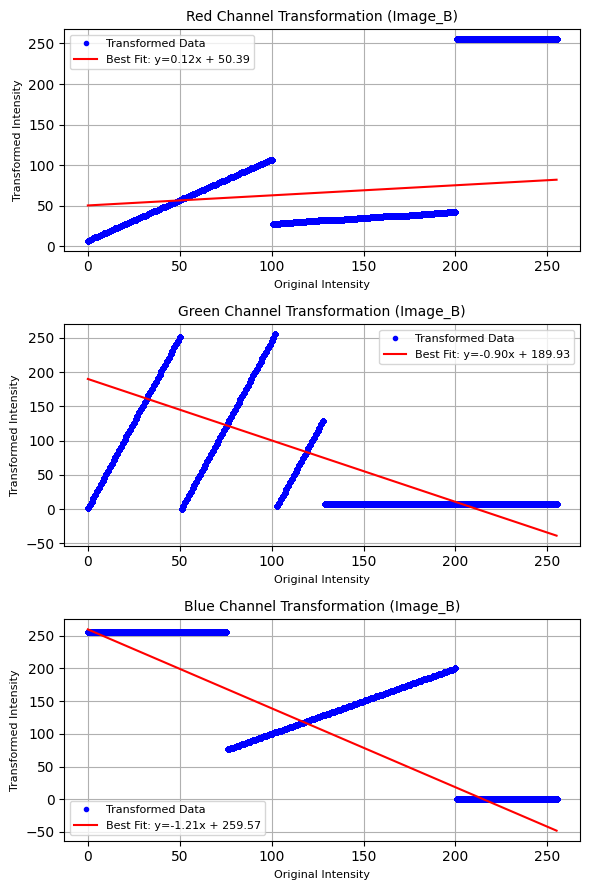

In [14]:
# Function to plot intensity vs. transformed intensity and fit a line
def plot_intensity_vs_transformed(ax, channel_data, transformed_data, title):
    flattened_channel = channel_data.flatten()
    flattened_transformed = transformed_data.flatten()

    ax.plot(flattened_channel, flattened_transformed, 'b.', label='Transformed Data')

    A = np.vstack([flattened_channel, np.ones_like(flattened_channel)]).T
    m, c = np.linalg.lstsq(A, flattened_transformed, rcond=None)[0]

    x_fit = np.linspace(0, 255, 256)
    y_fit = m * x_fit + c
    ax.plot(x_fit, y_fit, 'r-', label=f'Best Fit: y={m:.2f}x + {c:.2f}')

    ax.set_title(title, fontsize=10)
    ax.set_xlabel('Original Intensity', fontsize=8)
    ax.set_ylabel('Transformed Intensity', fontsize=8)
    ax.legend(fontsize=8)
    ax.grid(True)
    
    return m, c

# Function to plot the intensity transformations for all RGB channels and save the plot
def plot_rgb_transformations(channels, transformed_channels, image_label, out_dir):
    fig, axs = plt.subplots(3, 1, figsize=(6, 9))
    colors = ['Red', 'Green', 'Blue']
    results = {}

    for i, color in enumerate(colors):
        m, c = plot_intensity_vs_transformed(
            axs[i], 
            channels[i], 
            transformed_channels[i], 
            f"{color} Channel Transformation ({image_label})"
        )
        results[f'm_{color.lower()}'] = m
        results[f'c_{color.lower()}'] = c

    plt.tight_layout()

    output_path = os.path.join(out_dir, f'{image_label}_rgb_transformations.png')
    plt.savefig(output_path)
    plt.show()
    
    return results

out_dir = '../out_img'
os.makedirs(out_dir, exist_ok=True) 

channels_A = [red_A, green_A, blue_A]
transformed_channels_A = [red_A_transformed, green_A_transformed, blue_A_transformed]
results_A = plot_rgb_transformations(channels_A, transformed_channels_A, "Image_A", out_dir)

channels_B = [red_B, green_B, blue_B]
transformed_channels_B = [red_B_transformed, green_B_transformed, blue_B_transformed]
results_B = plot_rgb_transformations(channels_B, transformed_channels_B, "Image_B", out_dir)


### Part 4.3

Best Fit Line Equations for Image A:


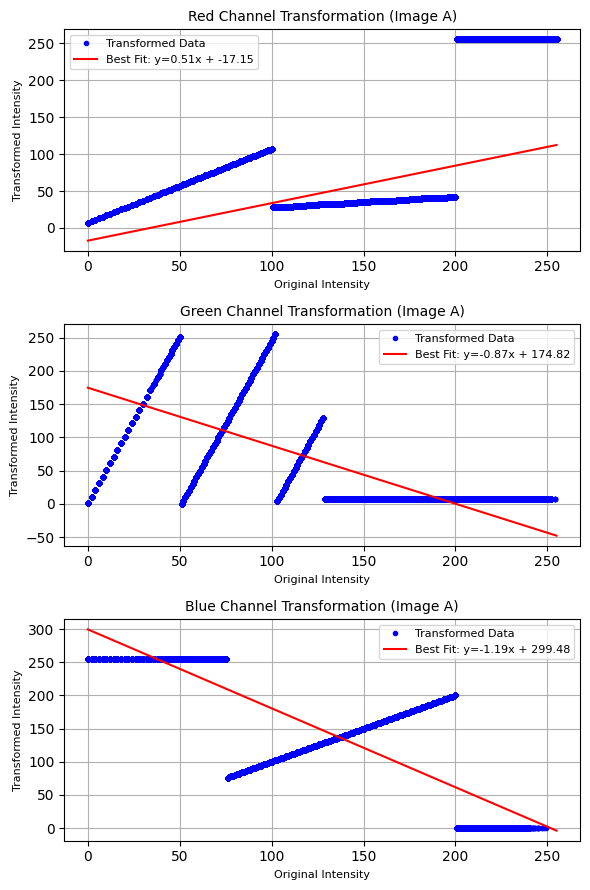

Red Channel: y = 0.51x + -17.15
Green Channel: y = -0.87x + 174.82
Blue Channel: y = -1.19x + 299.48

Best Fit Line Equations for Image B:


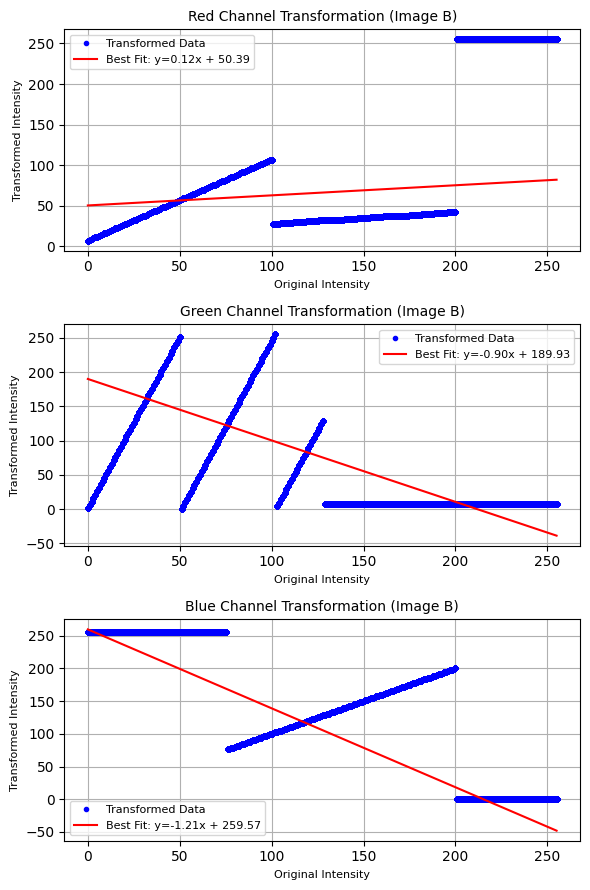

Red Channel: y = 0.12x + 50.39
Green Channel: y = -0.90x + 189.93
Blue Channel: y = -1.21x + 259.57


In [15]:
print("Best Fit Line Equations for Image A:")

fig_A, axs_A = plt.subplots(3, 1, figsize=(6, 9))

m_red_A, c_red_A = plot_intensity_vs_transformed(axs_A[0], red_A, red_A_transformed, "Red Channel Transformation (Image A)")
m_green_A, c_green_A = plot_intensity_vs_transformed(axs_A[1], green_A, green_A_transformed, "Green Channel Transformation (Image A)")
m_blue_A, c_blue_A = plot_intensity_vs_transformed(axs_A[2], blue_A, blue_A_transformed, "Blue Channel Transformation (Image A)")

plt.tight_layout()
plt.show()

print(f"Red Channel: y = {m_red_A:.2f}x + {c_red_A:.2f}")
print(f"Green Channel: y = {m_green_A:.2f}x + {c_green_A:.2f}")
print(f"Blue Channel: y = {m_blue_A:.2f}x + {c_blue_A:.2f}")


print("\nBest Fit Line Equations for Image B:")

fig_B, axs_B = plt.subplots(3, 1, figsize=(6, 9))

m_red_B, c_red_B = plot_intensity_vs_transformed(axs_B[0], red_B, red_B_transformed, "Red Channel Transformation (Image B)")
m_green_B, c_green_B = plot_intensity_vs_transformed(axs_B[1], green_B, green_B_transformed, "Green Channel Transformation (Image B)")
m_blue_B, c_blue_B = plot_intensity_vs_transformed(axs_B[2], blue_B, blue_B_transformed, "Blue Channel Transformation (Image B)")

plt.tight_layout()
plt.show()

print(f"Red Channel: y = {m_red_B:.2f}x + {c_red_B:.2f}")
print(f"Green Channel: y = {m_green_B:.2f}x + {c_green_B:.2f}")
print(f"Blue Channel: y = {m_blue_B:.2f}x + {c_blue_B:.2f}")

Image A: 

Red Channel: The strong positive correlation and the diagonal line suggest a simple scaling or offset transformation. Since the image background is reddish, therefore, based upon the neighbourhood pixel intensity values, all the pixels of the red channel in line of best fit are adjusted to a value of 200 and above signifying a strong reddish color in the mod_trans image.
Green Channel and Blue Channel: The negative correlation and the diagonal line suggest a reversal of intensities, possibly a negation. It is because, the image A is reddish in color with low values across Green and Blue Channels, thus signifying a smaller value when the larger values of blue channels are encountered so that image appears reddish based upon the line of best fit.

Image B:

Red, Blue and Green Channel: Since the image in general is lightish in color and very bright in appearance, which signifies that a pixel having very high values of any channel, should be penalised. That is what is done by the lines of best fit obtained across all 3 channels. As the values of pixel intensities increase, in order to make the pixel intensities smaller and lighter, the pixel intensities are penalised highly, and thus the negative slope.

### Part 4.4

Best Fit Line Equations for Image A:
Red Channel: y = 0.51x + -17.15
Green Channel: y = -0.87x + 174.82
Blue Channel: y = -1.19x + 299.48

Best Fit Line Equations for Image B:
Red Channel: y = 0.12x + 50.39
Green Channel: y = -0.90x + 189.93
Blue Channel: y = -1.21x + 259.57


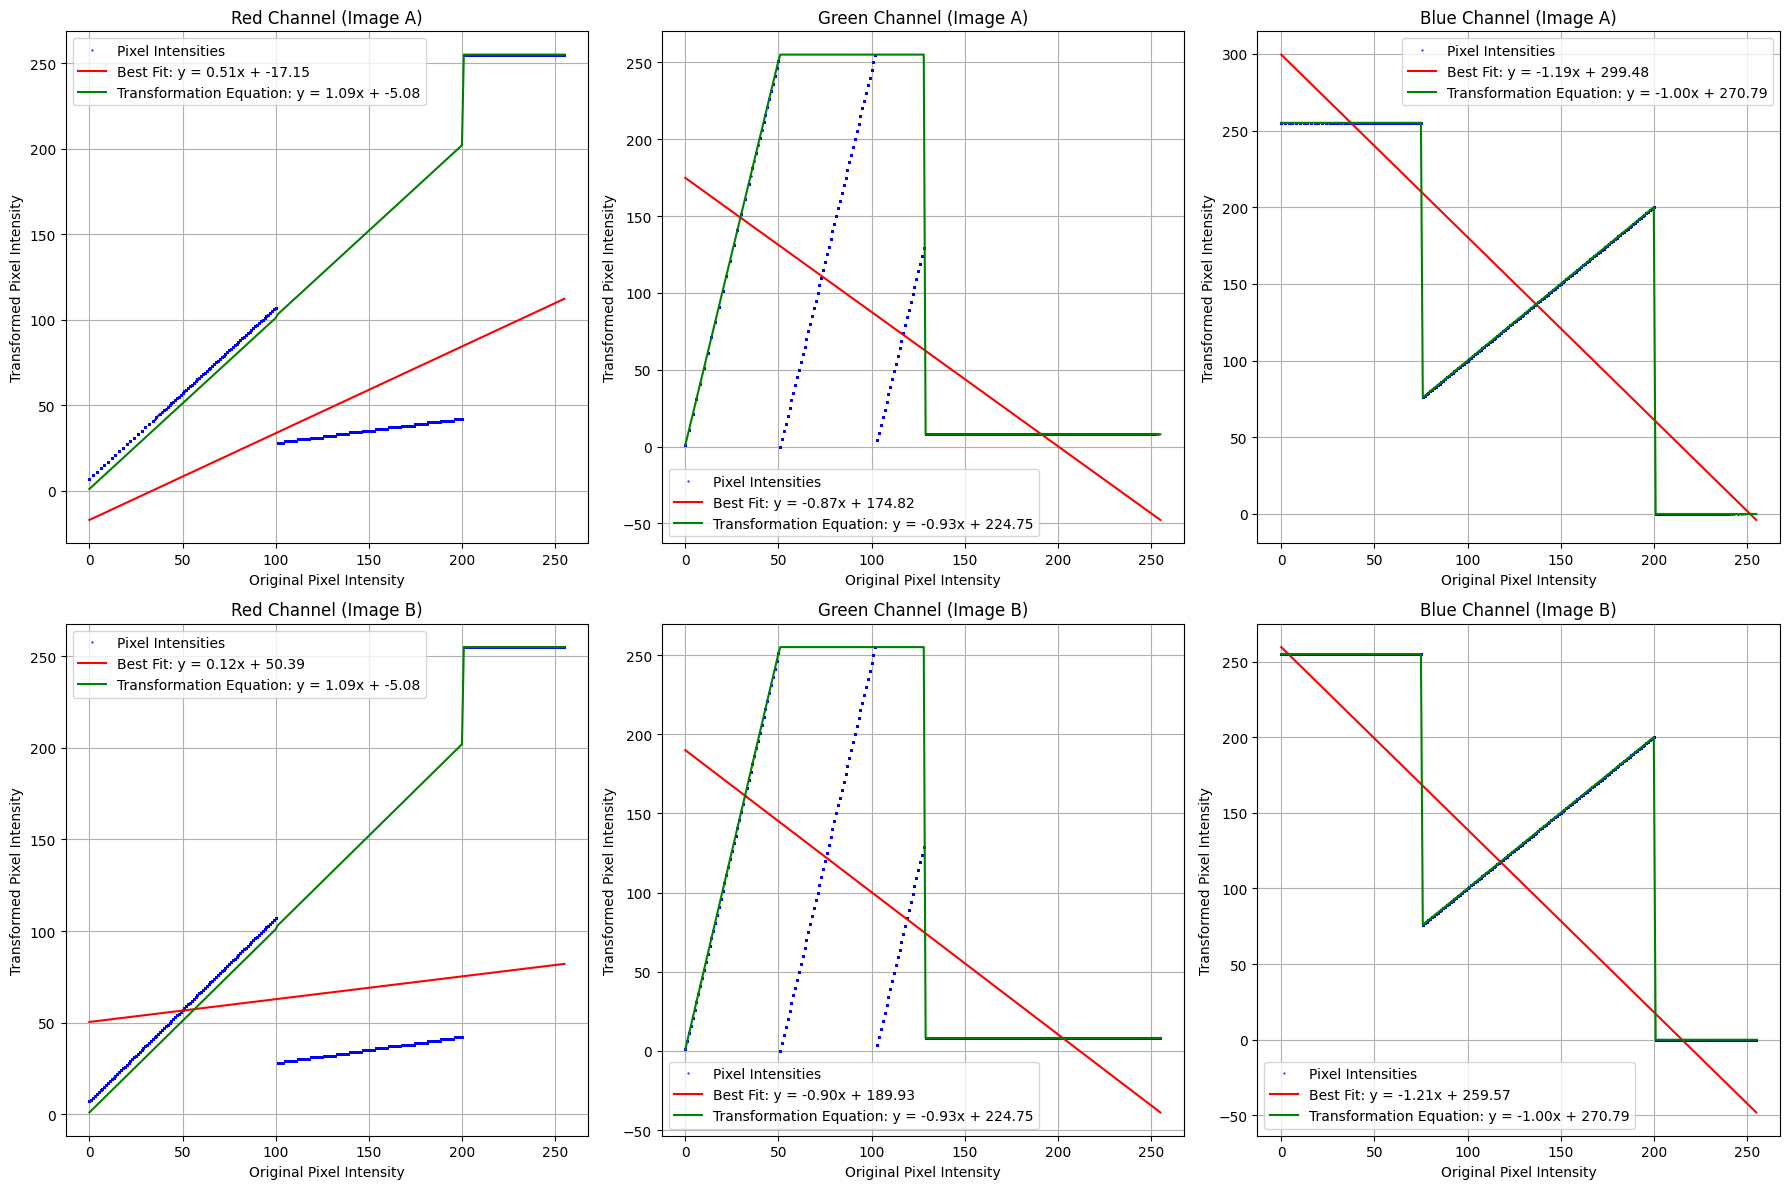

In [16]:
def plot_intensity_vs_transformed(ax, original_channel, transformed_channel, title, transform_func=None, a=1):
    ax.plot(original_channel.flatten(), transformed_channel.flatten(), 'b.', label='Pixel Intensities', markersize=1)
    
    A = np.vstack([original_channel.flatten(), np.ones_like(original_channel.flatten())]).T
    m, c = np.linalg.lstsq(A, transformed_channel.flatten(), rcond=None)[0]

    x_fit = np.linspace(0, 255, 256)
    y_fit = m * x_fit + c
    ax.plot(x_fit, y_fit, 'r-', label=f'Best Fit: y = {m:.2f}x + {c:.2f}')
    
    if transform_func:
        y_transform = transform_func(x_fit, a) if 'a' in transform_func.__code__.co_varnames else transform_func(x_fit)
        A_transform = np.vstack([x_fit, np.ones_like(x_fit)]).T
        m_eq, c_eq = np.linalg.lstsq(A_transform, y_transform, rcond=None)[0]
        ax.plot(x_fit, y_transform, 'g-', label=f'Transformation Equation: y = {m_eq:.2f}x + {c_eq:.2f}')
    
    ax.set_title(title)
    ax.set_xlabel('Original Pixel Intensity')
    ax.set_ylabel('Transformed Pixel Intensity')
    ax.legend()
    ax.grid(True)
    
    return m, c

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

print("Best Fit Line Equations for Image A:")
m_red_A, c_red_A = plot_intensity_vs_transformed(axs[0, 0], red_A, red_A_transformed, "Red Channel (Image A)", transform_func=transform_red_channel, a=1)
m_green_A, c_green_A = plot_intensity_vs_transformed(axs[0, 1], green_A, green_A_transformed, "Green Channel (Image A)", transform_func=transform_green_channel, a=1)
m_blue_A, c_blue_A = plot_intensity_vs_transformed(axs[0, 2], blue_A, blue_A_transformed, "Blue Channel (Image A)", transform_func=transform_blue_channel)

print(f"Red Channel: y = {m_red_A:.2f}x + {c_red_A:.2f}")
print(f"Green Channel: y = {m_green_A:.2f}x + {c_green_A:.2f}")
print(f"Blue Channel: y = {m_blue_A:.2f}x + {c_blue_A:.2f}")

print("\nBest Fit Line Equations for Image B:")
m_red_B, c_red_B = plot_intensity_vs_transformed(axs[1, 0], red_B, red_B_transformed, "Red Channel (Image B)", transform_func=transform_red_channel, a=1)
m_green_B, c_green_B = plot_intensity_vs_transformed(axs[1, 1], green_B, green_B_transformed, "Green Channel (Image B)", transform_func=transform_green_channel, a=1)
m_blue_B, c_blue_B = plot_intensity_vs_transformed(axs[1, 2], blue_B, blue_B_transformed, "Blue Channel (Image B)", transform_func=transform_blue_channel)

print(f"Red Channel: y = {m_red_B:.2f}x + {c_red_B:.2f}")
print(f"Green Channel: y = {m_green_B:.2f}x + {c_green_B:.2f}")
print(f"Blue Channel: y = {m_blue_B:.2f}x + {c_blue_B:.2f}")

plt.tight_layout()

out_dir = '../out_img'
os.makedirs(out_dir, exist_ok=True)

output_path = os.path.join(out_dir, 'image_A_vs_image_B_transformations.png')
plt.savefig(output_path)

plt.show()


### Part 4.5

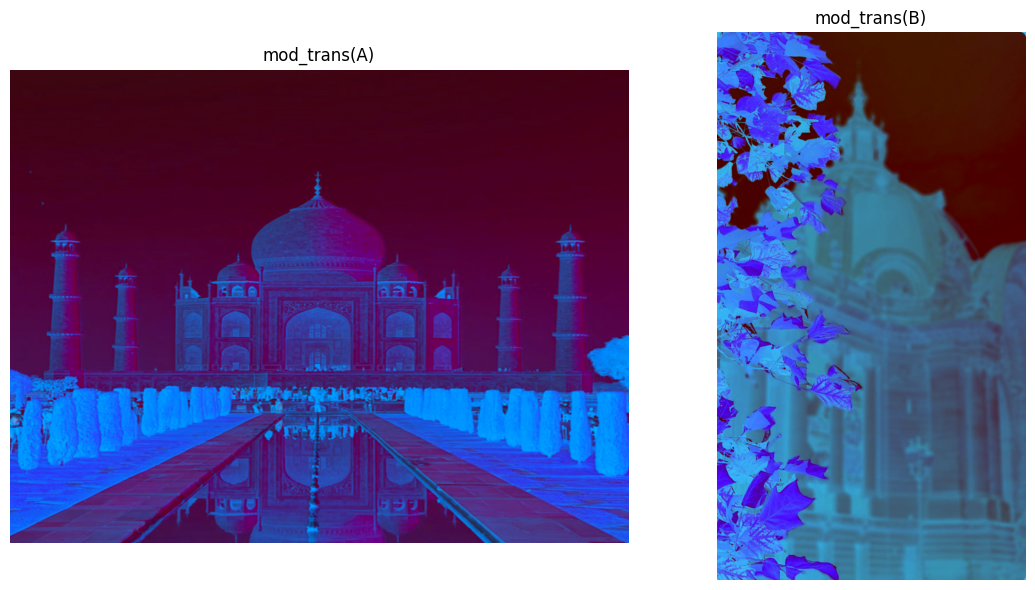

In [17]:
def apply_linear_transformation(channel, m, c):
    transformed_channel = m * channel + c
    transformed_channel = np.clip(transformed_channel, 0, 255)  # Ensure the values are within valid range
    return transformed_channel.astype(np.uint8)

# Apply transformations to each channel for image A
mod_trans_A_red = apply_linear_transformation(red_A, m_red_A, c_red_A)
mod_trans_A_green = apply_linear_transformation(green_A, m_green_A, c_green_A)
mod_trans_A_blue = apply_linear_transformation(blue_A, m_blue_A, c_blue_A)

mod_trans_A = np.stack((mod_trans_A_red, mod_trans_A_green, mod_trans_A_blue), axis=2)

# Apply transformations to each channel for image B
mod_trans_B_red = apply_linear_transformation(red_B, m_red_B, c_red_B)
mod_trans_B_green = apply_linear_transformation(green_B, m_green_B, c_green_B)
mod_trans_B_blue = apply_linear_transformation(blue_B, m_blue_B, c_blue_B)

mod_trans_B = np.stack((mod_trans_B_red, mod_trans_B_green, mod_trans_B_blue), axis=2)


out_dir = '../out_img'
os.makedirs(out_dir, exist_ok=True)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(mod_trans_A)
axs[0].set_title("mod_trans(A)")
axs[0].axis('off')

axs[1].imshow(mod_trans_B)
axs[1].set_title("mod_trans(B)")
axs[1].axis('off')

plt.tight_layout()

output_path = os.path.join(out_dir, 'mod_trans_A_B.png')
plt.savefig(output_path)
plt.show()


### Part 4.6

Best Fit Line Equations for mod_trans(A) vs transformed(A):
Red Channel: y = 0.14x + 54.24
Green Channel: y = 0.54x + 15.42
Blue Channel: y = 0.66x + 33.87


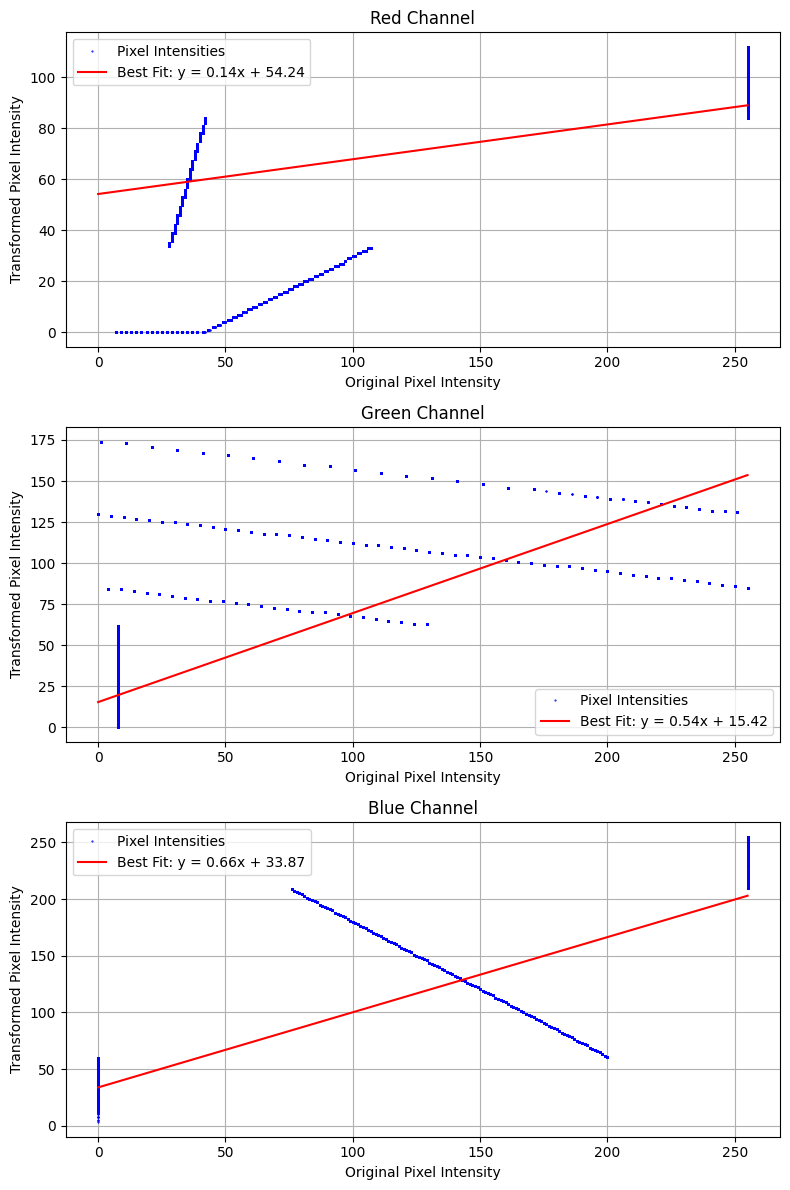


Best Fit Line Equations for mod_trans(B) vs transformed(B):
Red Channel: y = 0.02x + 62.89
Green Channel: y = 0.35x + 55.50
Blue Channel: y = 0.77x + 31.96


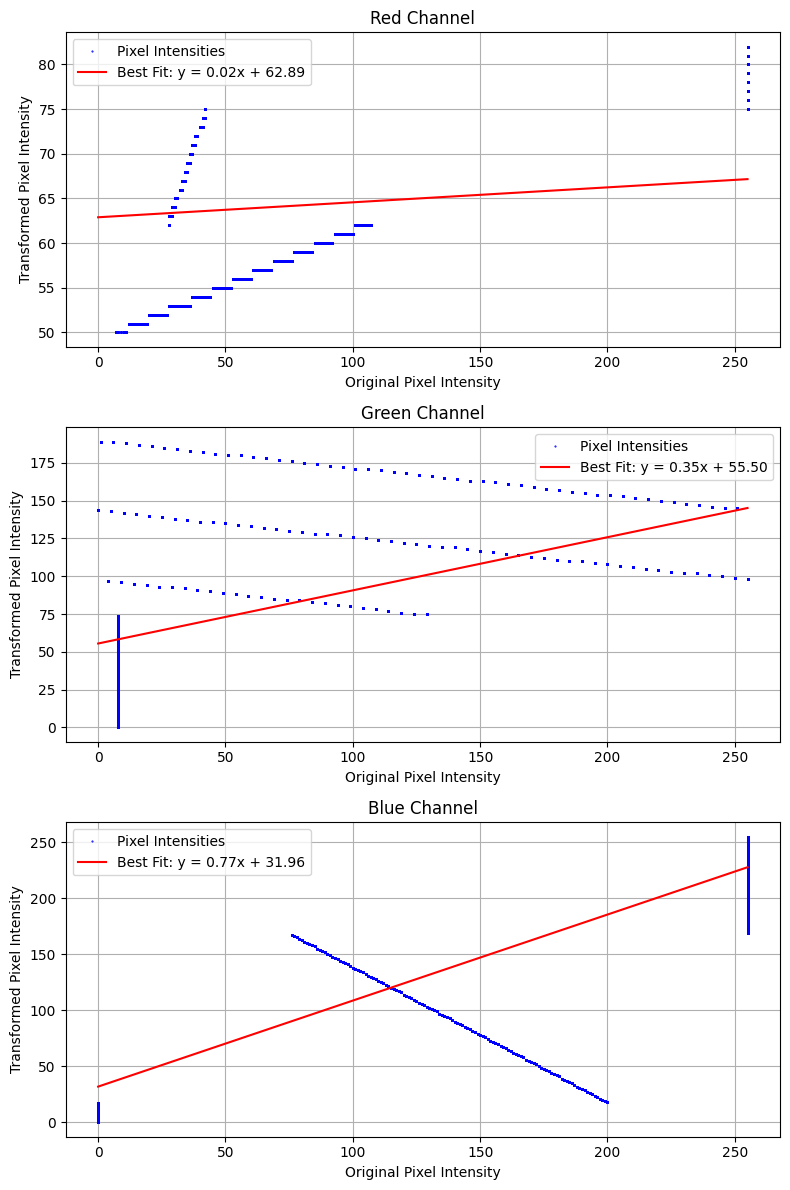

In [18]:
# Extract color channels for transformed_A and mod_trans_A
red_transformed_A = transformed_A[:, :, 0]
green_transformed_A = transformed_A[:, :, 1]
blue_transformed_A = transformed_A[:, :, 2]

red_mod_trans_A = mod_trans_A[:, :, 0]
green_mod_trans_A = mod_trans_A[:, :, 1]
blue_mod_trans_A = mod_trans_A[:, :, 2]

# Extract color channels for transformed_B and mod_trans_B
red_transformed_B = transformed_B[:, :, 0]
green_transformed_B = transformed_B[:, :, 1]
blue_transformed_B = transformed_B[:, :, 2]

red_mod_trans_B = mod_trans_B[:, :, 0]
green_mod_trans_B = mod_trans_B[:, :, 1]
blue_mod_trans_B = mod_trans_B[:, :, 2]

# Set the output directory
out_dir = '../out_img'
os.makedirs(out_dir, exist_ok=True)

# Prepare the figure for image A (transformed_A vs mod_trans_A)
fig_A, axs_A = plt.subplots(3, 1, figsize=(8, 12))

print("Best Fit Line Equations for mod_trans(A) vs transformed(A):")
m_red_A, c_red_A = plot_intensity_vs_transformed(axs_A[0], red_transformed_A, red_mod_trans_A, "Red Channel")
m_green_A, c_green_A = plot_intensity_vs_transformed(axs_A[1], green_transformed_A, green_mod_trans_A, "Green Channel")
m_blue_A, c_blue_A = plot_intensity_vs_transformed(axs_A[2], blue_transformed_A, blue_mod_trans_A, "Blue Channel")

print(f"Red Channel: y = {m_red_A:.2f}x + {c_red_A:.2f}")
print(f"Green Channel: y = {m_green_A:.2f}x + {c_green_A:.2f}")
print(f"Blue Channel: y = {m_blue_A:.2f}x + {c_blue_A:.2f}")

plt.tight_layout()


output_path_A = os.path.join(out_dir, 'mod_trans_A_vs_transformed_A.png')
plt.savefig(output_path_A)
plt.show()


fig_B, axs_B = plt.subplots(3, 1, figsize=(8, 12))

print("\nBest Fit Line Equations for mod_trans(B) vs transformed(B):")
m_red_B, c_red_B = plot_intensity_vs_transformed(axs_B[0], red_transformed_B, red_mod_trans_B, "Red Channel")
m_green_B, c_green_B = plot_intensity_vs_transformed(axs_B[1], green_transformed_B, green_mod_trans_B, "Green Channel")
m_blue_B, c_blue_B = plot_intensity_vs_transformed(axs_B[2], blue_transformed_B, blue_mod_trans_B, "Blue Channel")

print(f"Red Channel: y = {m_red_B:.2f}x + {c_red_B:.2f}")
print(f"Green Channel: y = {m_green_B:.2f}x + {c_green_B:.2f}")
print(f"Blue Channel: y = {m_blue_B:.2f}x + {c_blue_B:.2f}")

plt.tight_layout()

output_path_B = os.path.join(out_dir, 'mod_trans_B_vs_transformed_B.png')
plt.savefig(output_path_B)
plt.show()


Part 4.7 The difference between transformed(x) and mod_trans(x) is that mod_trans(x) applies a linear transformation (using the line of best fit) to the pixel values, while transformed(x) may involve a more complex or non-linear transformation.

The first image was a bit distorted and as a result of the discontinuous pixel linear transformations.

Yes, the transformation in mod_trans(x) can be considered a filter, specifically a linear filter, since it modifies the image by applying a linear function to the pixel intensities.  Since, the image pixels are smoothened out based upon the pixels in the neighbourhood, we can say that this transformation can be referred to as a filter because this is what a filter does, based upon neighbourhood pixels, smoothen out the image.